# Generador de Material Educativo Personalizado mediante IA

## Desafíos y Problemática en la Preparación de Recursos Educativos

### Problema
La creación de materiales educativos atractivos y adaptados es un desafío para los docentes. Requiere mucho tiempo y creatividad, y a menudo los recursos resultantes no logran captar el interés de los estudiantes.

### Solución Propuesta
Utilizar **plantillas de prompts reutilizables** para aprovechar la inteligencia artificial generativa. Esto nos permitirá crear explicaciones y actividades de repaso claras, concisas y personalizadas de manera rápida y eficiente.

### La viabilidad técnica del proyecto se sustenta en los siguientes puntos

- La generación de explicaciones y ejercicios es una de las principales capacidades de los modelos de texto. 
- La creación de imágenes educativas con prompts bien diseñados es factible y se puede adaptar en estilo infantil. 
- Los recursos necesarios son mínimos: conexión a internet y acceso a los modelos de IA gratuitos trabajados en el curso. 
- El tiempo requerido para preparar ejemplos de prompts y probarlos es razonable, ya que se puede trabajar tema por tema.

### Objetivos

- Reducir el tiempo que los docentes dedican a preparar materiales educativos mediante la generación automática de explicaciones y ejercicios.
- Mejorar la claridad y atractivo de los recursos educativos.
- Generar ejemplos y actividades que motiven al estudiante.

### Metodología

1. Seleccionar un tema educativo específico.
2. Crear prompts optimizados e implementar técnicas como Fast Prompting y One-shot para generar explicaciones, ejercicios o imágenes.
   
- Los prompts optimizados y técnicas como Fast Prompting aseguran que el contenido generado sea claro, estructurado y adaptado. One-shot prompting permite al modelo aprender de un ejemplo previo, mejorando la precisión y utilidad del material educativo generado, reduciendo iteraciones y tiempo de preparación.

### Herramientas y Tecnologías – Técnicas de prompting

- **Fast Prompting**  
   Nos permitira estructurar los prompts de manera precisa, incluyendo rol, tema, detalle, enfoque, nivel educativo, curso/materia e instrucciones, lo que mejora la claridad y relevancia de las explicaciones y actividades generadas. Esta técnica optimiza el tiempo del docente al reducir la necesidad de corregir o adaptar el contenido generado.

- **One-shot prompting**  
   Proporcionar un ejemplo previo al modelo ayuda a que genere contenido coherente siguiendo el mismo formato o estilo deseado. Esto es especialmente útil en la preparación de recursos educativos, porque permite que las explicaciones y ejercicios sigan un patrón didáctico claro y adaptado al nivel de los estudiantes.

### Implementación

1. Instalación de libreria

In [1]:
!pip install openai 


2. Importar librerías y configurar OpenAI

In [2]:
from openai import OpenAI
import os

client = OpenAI(
    api_key=os.getenv("GEMINI_API_KEY"),
    base_url='https://generativelanguage.googleapis.com/v1beta/openai/'
)

3. Función para modelo Texto-Texto

In [5]:
def generar_respuesta(prompt, modelo="models/gemini-1.5-flash-latest", temperatura=0.7, max_tokens=600):
    try:
        response = client.chat.completions.create(
            model=modelo,
            messages=[{"role": "user", "content": prompt}],
            temperature=temperatura,
            max_tokens=max_tokens
        )
        return response.choices[0].message.content
    except Exception as e:
        return f"An error occurred: {e}"


4. Plantilla Fast Prompting Texto-Texto

In [3]:
def plantilla_texto_explicacion(rol, tema, contenido, enfoque, nivel_educativo, curso_materia, instruccion_adicional=""):
   
    prompt = f"""
    Actúa como {rol}.
    Explica el tema {tema} incluyendo los siguientes contenidos: {contenido}.
    Que la explicación tenga un enfoque {enfoque}, para alumnos de {nivel_educativo} cursando {curso_materia}.
    Incluye como Instrucciones Adicionales: {instruccion_adicional}
    """
    return prompt

5. Ejemplo modelo Texto-Texto

In [48]:
rol_ejemplo = "Profesor de matemáticas"
tema_ejemplo = "Suma de fracciones"
contenido_ejemplo = "Definir denominador y numerados, Suma de fracciones con el mismo denominador, Suma de fracciones con diferente denominador, Método: Mínimo Común Múltiplo (MCM) "
enfoque_ejemplo = "Simple, educativo y didáctico con EMOJIS"
nivel_ejemplo = "tercer grado de primaria"
curso_ejemplo = "matemáticas"
instruccion_ejemplo = "Crea en base a la explicación un simulacro de evaluación. contemplar que contas con un max_token de 600. "

prompt_completo = plantilla_texto_explicacion(
    rol=rol_ejemplo,
    tema=tema_ejemplo,
    contenido=contenido_ejemplo,
    enfoque=enfoque_ejemplo,
    nivel_educativo=nivel_ejemplo,
    curso_materia=curso_ejemplo,
    instruccion_adicional=instruccion_ejemplo
)

print("--- Prompt Generado ---")
print(prompt_completo)

respuesta = generar_respuesta(prompt_completo)
print("\n--- Respuesta del Modelo ---")
print(respuesta)

--- Prompt Generado ---

    Actúa como Profesor de matemáticas.
    Explica el tema Suma de fracciones incluyendo los siguientes contenidos: Definir denominador y numerados, Suma de fracciones con el mismo denominador, Suma de fracciones con diferente denominador, Método: Mínimo Común Múltiplo (MCM) .
    Que la explicación tenga un enfoque Simple, educativo y didáctico con EMOJIS, para alumnos de tercer grado de primaria cursando matemáticas.
    Incluye como Instrucciones Adicionales: Crea en base a la explicación un simulacro de evaluación. contemplar que contas con un max_token de 600. 
    

--- Respuesta del Modelo ---
¡Hola, pequeños matemáticos! 👋 Hoy vamos a aprender a sumar fracciones. ¡Es más fácil de lo que parece! 🎉

**¿Qué son las fracciones?**

Imagina que tienes una pizza 🍕.  Si la cortas en cuatro partes iguales, cada parte es una fracción.  Escribimos las fracciones así:

**Numerador** / **Denominador**

* **El numerador (número de arriba):**  Nos dice cuántas partes

6. Función para modelo Texto-Imagen

In [ ]:
from image_generation import generate_images, ImageGenerationUsecase
import os


os.environ["GOOGLE_API_KEY"] = "CLAVE_API_PAGA"

def generar_imagen_con_api(prompt: str):

    try:
        print(f"Enviando solicitud para generar la imagen con el prompt:\n'{prompt}'\n")

        response = generate_images(prompts=[prompt], image_generation_usecase=ImageGenerationUsecase.ALTERNATIVES)
        
        if response.results and response.results[0].generated_images:
            content_id = response.results[0].content_id
            print(content_id)
        else:
            print("No se pudo generar la imagen. Inténtalo de nuevo con un prompt diferente.")

    except Exception as e:
        print(f"Ocurrió un error al generar la imagen: {e}")


mi_prompt_personalizado = "Quiero 2 filas de 4 focos de luces en blanco. Quiero que sea una imagen como un dibujo educativo, tipo dibujo animado, con formato y diseño para niños de 8 años. No salgas de esta indicación, respetala."

generar_imagen_con_api(mi_prompt_personalizado)

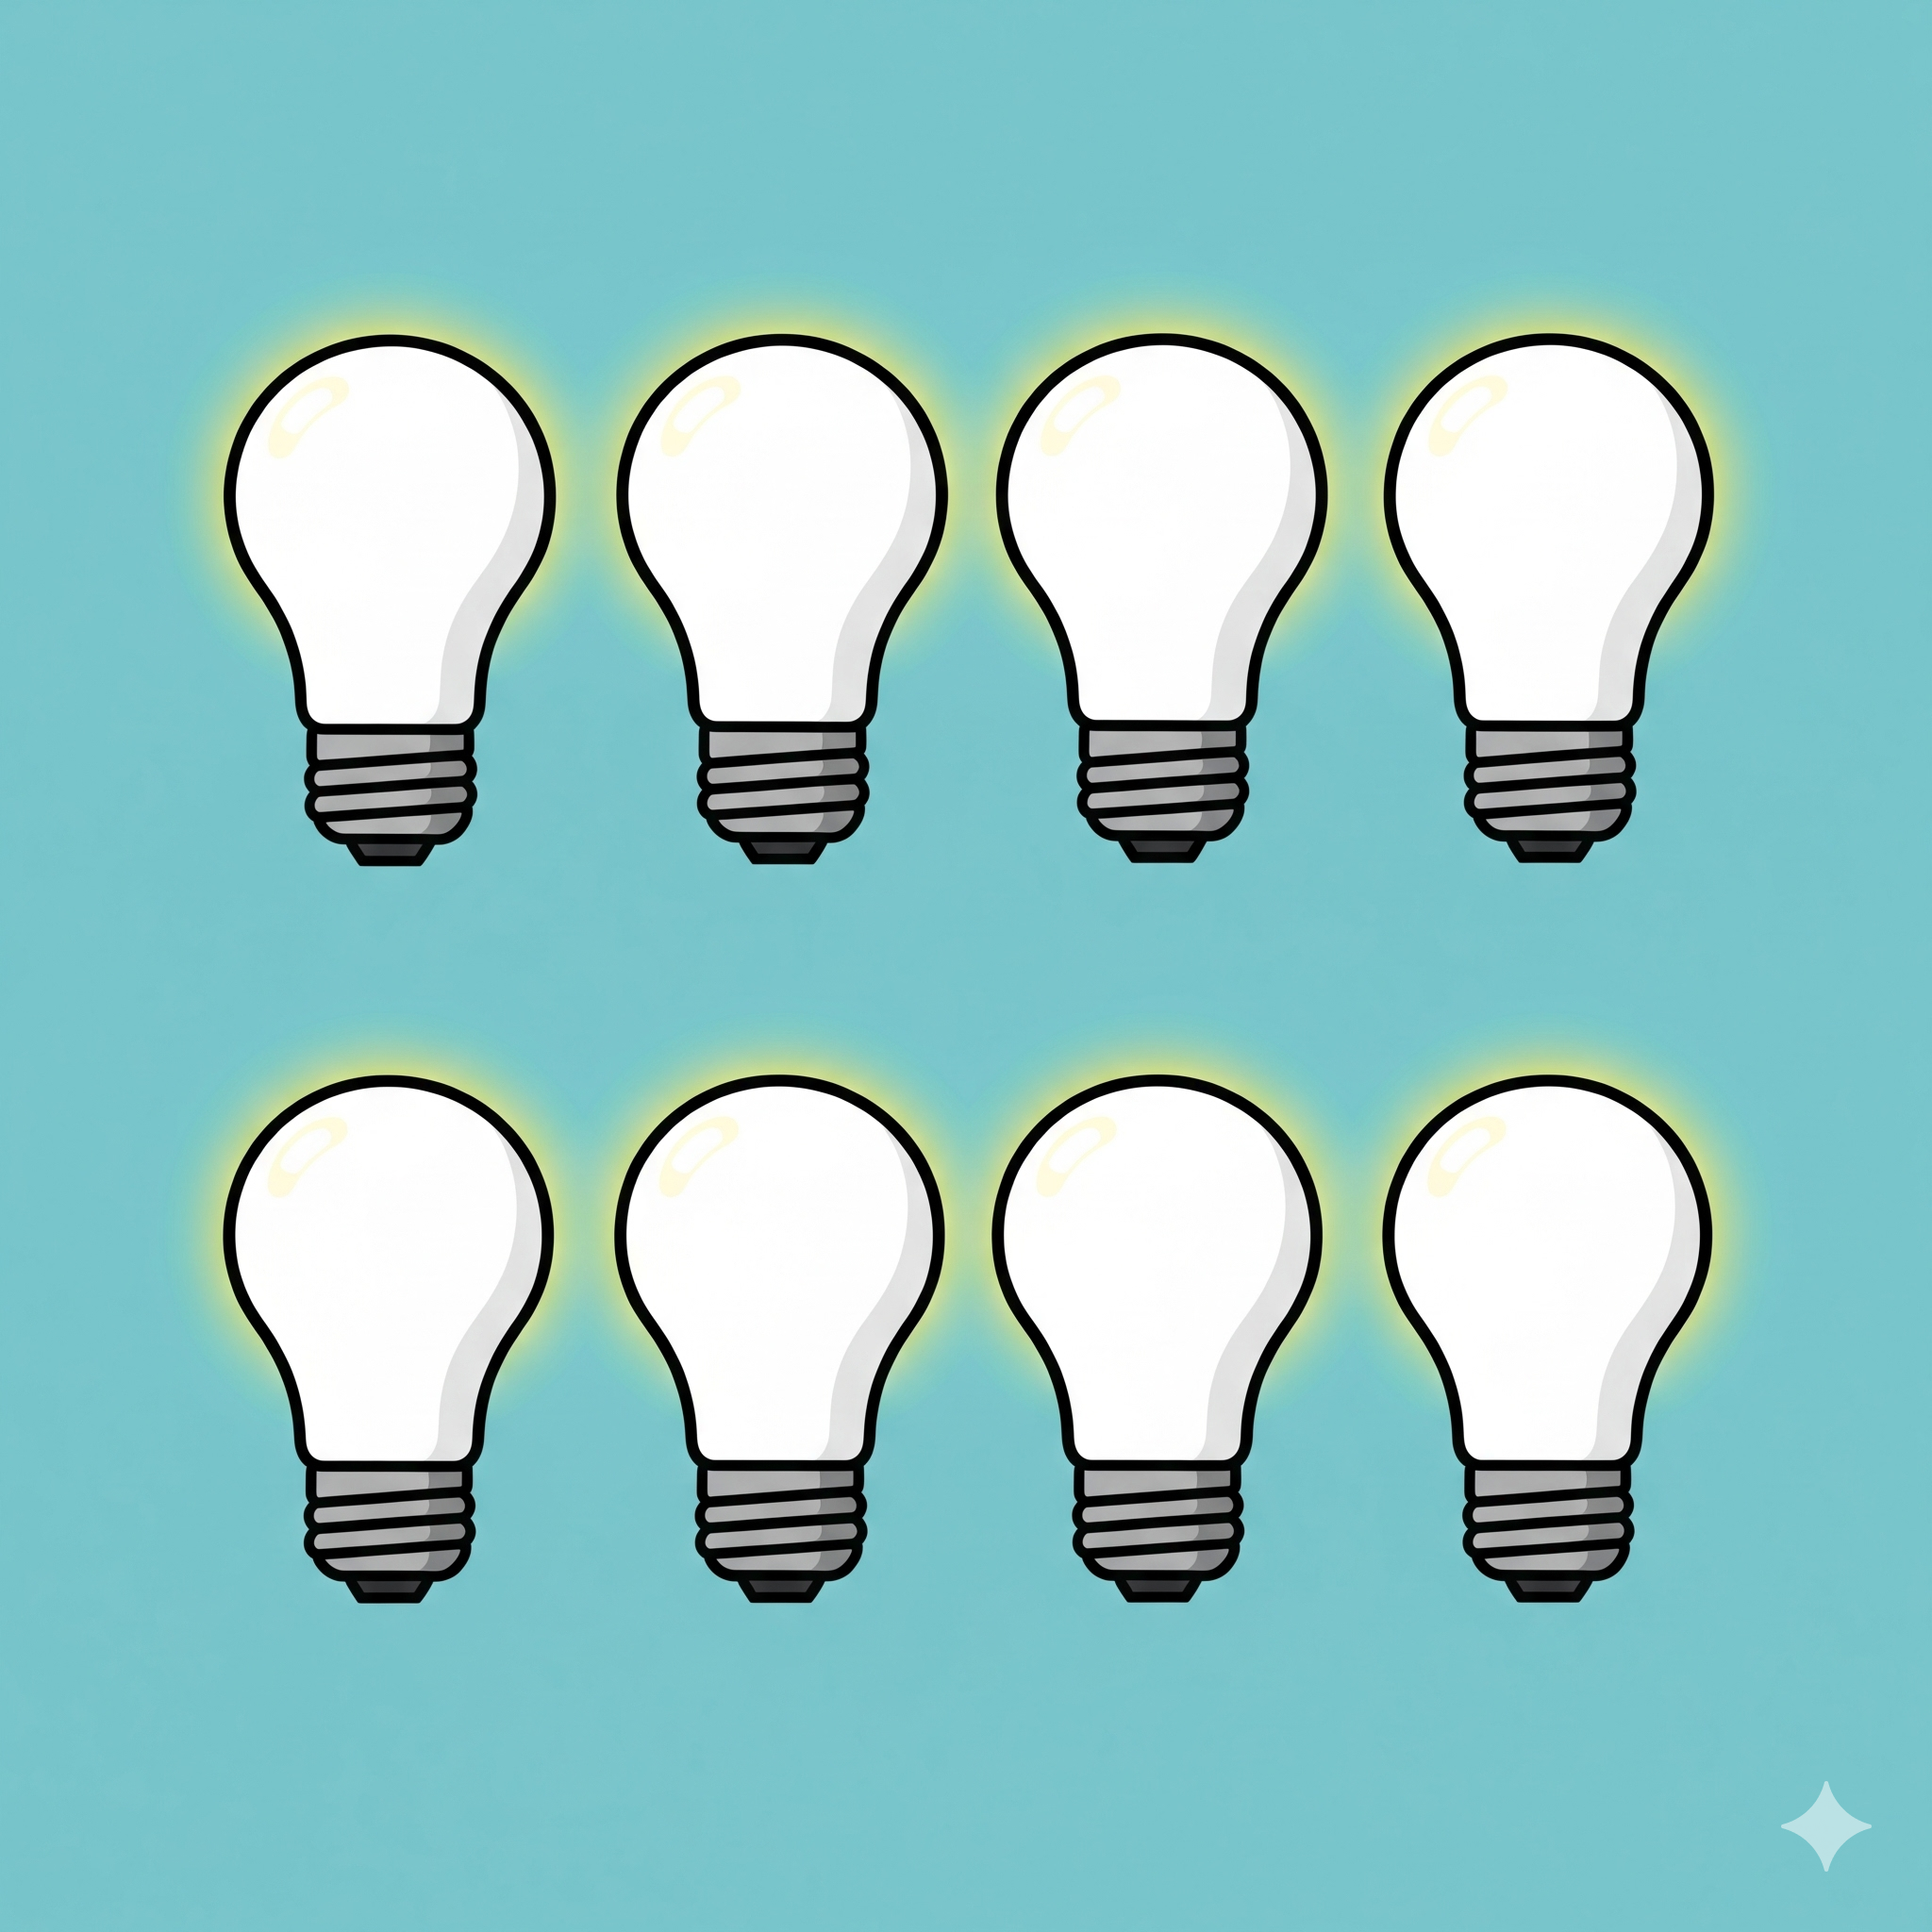

7. Juego implementando One-shot prompting modelo Texto-Texto

In [9]:
prompt_completo = """
Ejemplo de Prompt:
Crea un juego de cartas, con consignas a realizar.
---

Prompt Principal:
Crea un juego para niños de 8 años que les ayude a practicar fracciones de matemáticas. contemplar que se les entregara a cada niño una fotocopia con 2 filas de 4 focos todos en blanco, la cual pueden usar para ir pintando cada foco conforme cumplan la consigna.
"""

juego_generado = generar_respuesta(prompt=prompt_completo)

# 3. Imprime el resultado
print("---------------------------------")
print("El juego generado es:")
print(juego_generado)
print("---------------------------------")

---------------------------------
El juego generado es:
## ¡Ilumina las Fracciones! Un juego de cartas para niños de 8 años

**Objetivo:** Ser el primer jugador en iluminar todos los focos de su hoja de respuestas pintándolos.

**Materiales:**

* Un mazo de cartas con consignas (descritas abajo).
* Una hoja de respuestas para cada jugador con dos filas de cuatro focos (16 focos en total), todos en blanco.
* Lápices de colores o crayones.

**Preparación:**

1. Reparte una hoja de respuestas a cada jugador.
2. Baraja el mazo de cartas.

**Desarrollo del juego:**

Cada jugador, por turnos, toma una carta del mazo y realiza la consigna. Si la consigna es correcta, el jugador puede iluminar (pintar) la cantidad de focos que se indica en la carta. Si la consigna es incorrecta, el jugador pierde su turno. El juego continúa hasta que un jugador ilumina todos sus 16 focos.

**Ejemplos de Cartas (consignas):**

(Recuerda adaptar las fracciones a la comprensión de niños de 8 años. Puedes usar rep